#SQL - 45 min

A partir de la base de données client ci-dessous, crée une **requête SQL** qui fournit :

1.   les noms de chaque catégorie,
2.   le chiffre d'affaire associé à cette catégorie,
3.   et le prix moyen **pondéré** des produits vendus pour cette catégorie.

Le prix moyen sera arrondi à 2 décimales.

Ce tableau devra être trié pour avoir les catégories avec le chiffre d'affaire le plus élevé en premier.


*** Voici le schéma de la base ***
*********************

![](https://github.com/murpi/wilddata/blob/master/quests/orders_schema.png?raw=true)




*** Voici les premières lignes attendues ***
*********************

Categories | Chiffre_d_affaire | Prix_moyen
- |:-: | -:
Beverages | 99464.50 | 43.45
Dairy Products | 69921.00 | 26.88
... | ... | ...


In [1]:
# Exécute le code ci-dessous sans rien modifier
import requests
import sqlite3
import pandas as pd
r = requests.get('https://github.com/WildCodeSchool/wilddata/blob/main/orders.db?raw=true')
open('orders.db', 'wb').write(r.content)
conn = sqlite3.connect('orders.db')
def SQL(script):
    global conn
    return pd.read_sql(script, conn)



In [23]:
# Modifie la requête SQL dans cette variable
script_sql = """
-- Ici tu peux écrire ton code SQL

SELECT
    c.CategoryName as Categories,
    ROUND(SUM(p.price * od.quantity), 2) as Chiffre_d_Affaires,
    ROUND(SUM(p.price*od.quantity)/SUM(od.quantity), 2) as Prix_moyen
FROM
    categories c
JOIN products p ON c.categoryID = p.categoryID
JOIN order_details od ON od.productID = p.productID
GROUP BY Categories
ORDER BY Chiffre_d_Affaires DESC


-- Ne modifie rien ci-dessous pour obtenir le résultat de la requête

"""
SQL(script_sql)

,Categories,Chiffre_d_Affaires,Prix_moyen
0,Beverages,99464.50,43.45
1,Dairy Products,69921.00,26.88
2,Confections,54909.16,26.02
3,Meat/Poultry,51676.52,40.12
4,Condiments,35071.60,25.36
5,Seafood,29652.30,20.52
6,Produce,23401.40,32.73
7,Grains/Cereals,22327.75,24.48


# Tableur ou Business Intelligence - 45 min

Le responsable du reporting mensuel est absent, et il faut absolument envoyer le reporting de chiffre d'affaire (quantité * prix de chaque produit) aujourd'hui... mais impossible de remettre la main sur le fichier du mois dernier !

Heureusement, tu as trouvé comment extraire les données, [tu les trouveras ici.](https://docs.google.com/spreadsheets/d/1T7zh6Swn4Yj8Feu-xcp-B7xeOQfBoBSWn7sRjx07GvI/edit?usp=sharing)

Tu vas maintenant devoir recréer un graphique qui ressemblera au maximum à celui-ci, mais **en incluant les données du dernier mois**. Tu en profiteras pour ajouter **l'affichage des mois sous les colonnes**. Tu essaieras au maximum d'utiliser les tableaux croisés dynamiques pour faire cela.
**Tu peux utiliser l'outil de ton choix (GSheets, MS Excel, MS Power BI ou Tableau).**

Tu incluras l'image du graphique dans ce notebook, et tu indiqueras également le lien de ton google spreadsheet (ou MS Excel online) que tu auras pris soin de partager.

**Ne t'embête pas à avoir exactement les mêmes couleurs** que sur l'exemple, notamment si tu as utilisé un autre outil, ce sont les valeurs et la lisibilité qui sont importantes.

![Tableur checkpoint](https://github.com/murpi/wilddata/raw/master/checkpoint1_withoutdate.png)

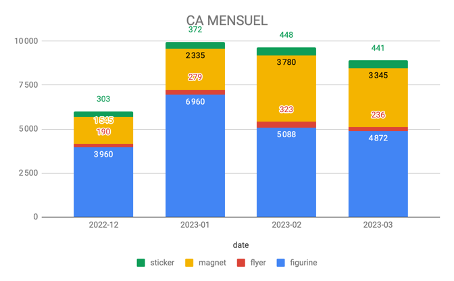

In [ ]:
# Lien du fichier de réponse :
https://docs.google.com/spreadsheets/d/1QXweALn9srRSCTDeEykLalZJ9tGd3Sl_07fZ-KDwcgI/edit?usp=sharing

# Python : Algo 1 Météo - 30 min

Tu veux créer un script qui te dit comment t'habiller en fonction de la météo du jour :


## 1.1 Température
* S'il fait strictement plus de 19 degrés,  le script doit afficher "Prends un t-shirt"
* S'il fait entre 12 et 19 degrés inclus, le script doit afficher "Prends un pull"
* S'il fait strictement moins de 12 degrés, le script doit afficher "Prends un manteau"

La variable température contiendra un nombre entier (nous avons mis `14` par défaut, n'hésite pas à modifier cette valeur pour tester)

In [3]:
temperature = 14

# Tu écriras ton script ici :

def habillement(temperature):
  if temperature > 19:
    return 'Prends un t-shirt'
  elif 12 <= temperature <= 19:
    return 'Prends un pull'
  else:
    return 'Prends un manteau'

habillement(14)

'Prends un pull'

## 1.2 Pluie

Tu va recopier ton script de la question précédente (1.1) et le modifier pour intégrer la contrainte suivante :
* Si la variable `pluie` vaut "YES", alors le script affiche "Prends un manteau", quelle que soit la température.

In [22]:
temperature = 14
pluie = "YES"

# Tu écriras ton script ici :

def habillement(temperature, pluie):
    if pluie == 'YES':
        return 'Prends un manteau'
    else:
        if temperature > 19:
            return 'Prends un t-shirt'
        elif 12 <= temperature <= 19:
            return 'Prends un pull'
        else:
            return 'Prends un manteau'

habillement(12, 'YES')

'Prends un manteau'

## 1.3 Opérateurs logiques (optionnel)

Essaye d'écrire le script précédent (1.2) en utilisant au maximum une seule fois la commande `if` et au maximum une seule fois la commande `elif`.

In [5]:
# Tu écriras ton script ici :

def habillement(temperature, pluie):
    if pluie == 'YES' or temperature < 12:
        return 'Prends un manteau'
    elif pluie != 'YES' and temperature > 19:
        return 'Prends un t-shirt'
    else:
        return 'Prends un pull'

habillement(14, 'YES')

'Prends un manteau'

# Python : Algo 2 - 30 min

Un magasin importe des produits américains et les revend sur le marché européen. Il propose à ses clients un discount pour les produits les plus chers (10% de réduction à partir de 500 euros d'achat, 15% à partir de 1000 euros, et 20% à partir de 2000 euros).

Le magasin a une liste de prix en dollars et fait appel à tes services pour déterminer pour chaque prix, le montant que paiera le client en euros (après application de la remise).


## Python 2.1 dollar_to_euro
Crée une fonction `dollar_to_euro` qui prend en paramètre un nombre décimal et retourne le montant converti en euro (dans le sens dollar vers euro, prends le taux en vigueur le jour du checkpoint).

In [7]:
def dollar_to_euro():
    montant_dollar = float(input('Montant en dollar : '))
    montant_euros = round(montant_dollar * 0.9277, 2)
    return montant_euros

dollar_to_euro()

Montant en dollar : 100


92.77

## Python 2.2 discount
Crée une fonction `discount` qui prend en paramètre un nombre décimal et retourne le pourcentage de réduction :
- 0.10 si l'argument est supérieur à 500
- 0.15 si l'argument est supérieur à 1000
- 0.20 si l'argument est supérieur à 2000

In [17]:
def discount():
    prix = float(input('Prix du produit : '))
    if prix > 2000:
        return 0.20
    elif prix > 1000:
        return 0.15
    elif prix > 500:
        return 0.10

discount()

Prix du produit : 750


0.1

## Python 2.3 Utilisation
Utilise tes deux fonctions pour **afficher une phrase** pour chacun des montants de cette liste de prix en dollars, indiquant le montant à payer en euros.
Tu dois donc appliquer d'abord la fonction de conversion pour obtenir des euros, puis la fonction de discount, puis afficher une phrase à partir du résultat.

In [18]:
price_list = [256, 1458, 2387, 669, 508, 1365]

def dollar_to_euro(montant_dollar):
    montant_euros = round(montant_dollar * 0.9277, 2)
    print(f'Le montant en euros est de {montant_euros} €.', end=' ')

    def discount(montant_euros):
        if montant_euros > 2000:
            reduction = 0.20
            print(f'La réduction est de {round(reduction*100)} %.')
        elif montant_euros > 1000:
            reduction = 0.15
            print(f'La réduction est de {round(reduction*100)} %.')
        elif montant_euros > 500:
            reduction = 0.10
            print(f'La réduction est de {round(reduction*100)} %.')
        else:
            print(f"Il n'y a pas de réduction.")

    discount(montant_euros)

for element in price_list:
    dollar_to_euro(element)




Le montant en euros est de 237.49 €. Il n'y a pas de réduction.
Le montant en euros est de 1352.59 €. La réduction est de 15 %.
Le montant en euros est de 2214.42 €. La réduction est de 20 %.
Le montant en euros est de 620.63 €. La réduction est de 10 %.
Le montant en euros est de 471.27 €. Il n'y a pas de réduction.
Le montant en euros est de 1266.31 €. La réduction est de 15 %.


# Python : Algo 3 - 1h

Ecris une fonction *monnaie_a_rendre()* qui prend deux arguments obligatoires :
- montant de l'achat : float, supérieur à 0
- monnaie du client : integer, supérieur à 0

La fonction devra afficher la monnaie à rendre au client en un minimum de billets/pièces.

Attention, si la monnaie du client est insuffisante (inférieure à l'achat), il faudra l'indiquer.

Exemple :


```
monnaie_a_rendre(26.57 , 40)
>>> Nb billets 10 euros : 1
>>> Nb pièces 2 euros : 1
>>> Nb pièces 1 euro : 1
>>> Nb pièces 20 cents : 2
>>> Nb pièces 2 cents : 1
>>> Nb pièces 1 cent : 1
```



In [6]:
# Ta fonction ici :

def monnaie_a_rendre(montant, somme_donnee):
    if somme_donnee < montant:
        print('Somme insuffisante.')
    else:
        billets= [500, 200, 100, 50, 20, 10, 5]
        pieces = [200, 100, 50, 20, 10, 5, 2, 1]

        billets_rendus = []
        pieces_rendues = []

        somme_a_rendre = somme_donnee - montant

        euros = int(somme_a_rendre)
        euro = euros - euros % 5
        cents = int(round((somme_a_rendre - euros)*100,0)) + (euros % 5 * 100 )

        # EUROS

        reste_billets = euro
        for element in billets:
            if element > reste_billets:
                billets_rendus.append(0)
            elif element <= reste_billets:
                billets_rendus.append(reste_billets // element)
            reste_billets -= (reste_billets // element)*element

        # CENTS

        reste_pieces = cents
        for element in pieces:
            if element > reste_pieces:
                pieces_rendues.append(0)
            elif element <= reste_pieces:
                pieces_rendues.append(reste_pieces // element)
            reste_pieces -= (reste_pieces // element)*element


        for n in range(len(billets_rendus)):
            if billets_rendus[n] > 0:
                print(f'>>> Nb billets {billets[n]} euros : {billets_rendus[n]}')
        for n in range(len(pieces_rendues)):
            if pieces_rendues[n] != 0:
                if pieces[n] >= 100:
                    if pieces[n]//100 == 1:
                        print(f'>>> Nb pièces {pieces[n]//100} euro : {pieces_rendues[n]}')
                    else:
                        print(f'>>> Nb pièces {pieces[n]//100} euros : {pieces_rendues[n]}')
                else:
                    if pieces[n] == 1:
                        print(f'>>> Nb pièces {pieces[n]} cent : {pieces_rendues[n]}')
                    else:
                        print(f'>>> Nb pièces {pieces[n]} cents : {pieces_rendues[n]}')

In [ ]:
# Pour tester :
monnaie_a_rendre(26.57 , 40)

>>> Nb billets 10 euros : 1
>>> Nb pièces 2 euros : 1
>>> Nb pièces 1 euro : 1
>>> Nb pièces 20 cents : 2
>>> Nb pièces 2 cents : 1
>>> Nb pièces 1 cent : 1


In [ ]:
monnaie_a_rendre(27 , 40)

>>> Nb billets 10 euros : 1
>>> Nb pièces 2 euros : 1
>>> Nb pièces 1 euro : 1


In [ ]:
monnaie_a_rendre(27 , 20)

Somme insuffisante.


In [25]:
monnaie_a_rendre(12.79 , 40)

>>> Nb billets 20 euros : 1
>>> Nb billets 5 euros : 1
>>> Nb pièces 2 euros : 1
>>> Nb pièces 20 cents : 1
>>> Nb pièces 1 cent : 1
